# Transport across sections

`mom6_tools.section_transports` collection of functions for computing and plotting time-series of transports across vertical sections.

The goal of this notebook is the following:

1) server as an example on how to post-process the ESM/MOM6 vertical sections defined in diag_table. The location of the current vertical sections computed online can be found at the end of [this notebook](https://gist.github.com/gustavo-marques/bd6e9bb43062dcbc2abda91b757c7c4b); 

2) evaluate model experiments by comparing transports against observed estimates;

3) compare model results vs. another model results (TODO).

In [1]:
%matplotlib inline
from mom6_tools.section_transports import Transport, options
import matplotlib.pyplot as plt

### Define the arguments expected by class "Transport". These have been hard-coded here fow now...

In [12]:
# The following parameters must be set accordingly
######################################################
# case name - must be changed for each configuration
case_name = 'g.c2b6.GNYF.T62_t061.long_run_nuopc.001'
# Path to the run directory
path = "/glade/scratch/gmarques/g.c2b6.GNYF.T62_t061.long_run_nuopc.001/run/"
# initial and final years for computing time mean
year_start = 20
year_end = 90
# add your name and email address below
author = 'Gustavo Marques (gmarques@ucar.edu)'
######################################################
# create an empty class object
class args:
  pass

args.infile = path
args.year_start = year_start
args.year_end = year_end
args.case_name = case_name
args.label = ''
args.debug = False

### Observed flows, more options can be added here

* Griffies et al., 2016: OMIP contribution to CMIP6: experimental and diagnostic protocol for the physical component of the Ocean Model Intercomparison Project. Geosci. Model. Dev., 9, 3231-3296. doi:10.5194/gmd-9-3231-2016

In [9]:
observedFlows = {'Agulhas':(129.8,143.6), 'Barents Opening':2.0, 'Bering Strait':(0.7,1.1), 'Davis Strait':(-2.1,-1.1), 'Denmark Strait':(-4.8,-2.0),
                 'Drake Passage':(129.8,143.6), 'English Channel':(0.01,0.1), 'Faroe-Scotland':(0.8,1.0), 'Florida-Bahamas':(28.9,34.3),
                 'Fram Strait':(-4.7,0.7), 'Gibraltar Strait':0.11, 'Gibraltar Strait':(-1.0, 1.0), 'Iceland-Faroe':(4.35,4.85),
                 'Indonesian Throughflow':(-15.,-13.), 'Mozambique Channel':(-25.6,-7.8), 'Pacific Equatorial Undercurrent':(24.5,28.3),
                 'Taiwan-Luzon Strait':(-3.0,-1.8), 'Windward Passage':(-15.,5.)}
# We need some estimated transport for the following:
# Bab_al_mandeb_Strait
# Iceland-Norway
# Hormuz Strait

### Below we define a function for plotting transport time series. Note the following:

### <span style="color:green">green = mean transport is within observed values</span> 

### <span style="color:red">red    = mean transport is not within observed values</span> 

### <span style="color:gray">gray  = either there isn't observed values to compare with or just a mean value is available (not a range)</span> 

In [10]:
def plotPanel(section,observedFlows=None,colorCode=True):
    ax = plt.subplot(1,1,1)
    color = '#c3c3c3'; obsLabel = None
    if section.label in observedFlows.keys():
      if isinstance(observedFlows[section.label],tuple):
        if colorCode == True:
          if min(observedFlows[section.label]) <= section.data.mean() <= max(observedFlows[section.label]):
            color = '#90ee90'
          else: color = '#f26161'
        obsLabel = str(min(observedFlows[section.label])) + ' to ' + str(max(observedFlows[section.label]))
      else: obsLabel = str(observedFlows[section.label])
    plt.plot(section.time,section.data,color=color)
    plt.title(section.label,fontsize=14)
    plt.text(0.04,0.11,'Mean = '+'{0:.2f}'.format(section.data.mean()),transform=ax.transAxes,fontsize=14)
    if obsLabel is not None: plt.text(0.04,0.04,'Obs. = '+obsLabel,transform=ax.transAxes,fontsize=14)
    if section.ylim is not None: plt.ylim(section.ylim)
    plt.ylabel('Transport (Sv)',fontsize=14); plt.xlabel('Time since beginning of run (yr)',fontsize=14)
    return

## Plot section transports in alphabetical order

### Agulhas Section

Processing  Agulhas_Section


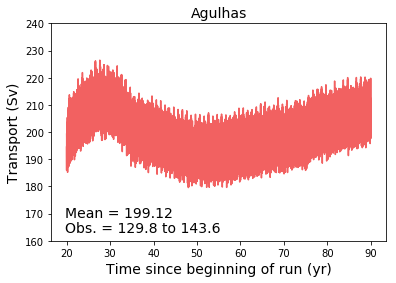

In [32]:
agulhas = Transport(args,'Agulhas_Section','umo',label='Agulhas',ylim=(160,240))
plotPanel(agulhas, observedFlows=observedFlows)

### Bab al mandeb Strait (Red Sea)

Processing  Bab_al_mandeb_Strait


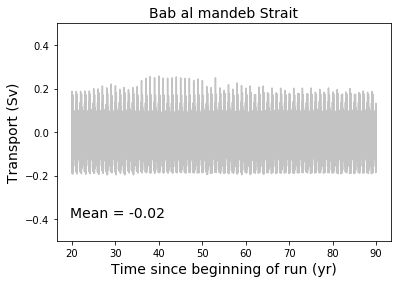

In [14]:
bab = Transport(args,'Bab_al_mandeb_Strait','umo',label='Bab al mandeb Strait',ylim=(-0.5, 0.5))
plotPanel(bab, observedFlows=observedFlows)

#### Bering Strait

Processing  Bering_Strait


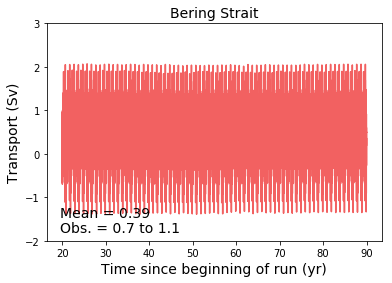

In [15]:
bering = Transport(args,'Bering_Strait','vmo',label='Bering Strait',ylim=(-2,3))
plotPanel(bering, observedFlows=observedFlows)

### Barents opening

Processing  Barents_opening


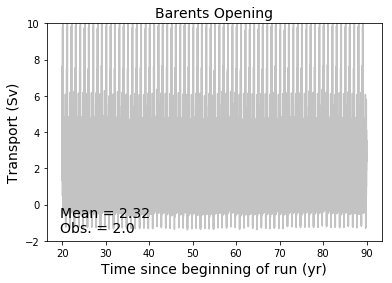

In [16]:
barents = Transport(args,'Barents_opening','vmo',label='Barents Opening',ylim=(-2,10))
plotPanel(barents, observedFlows=observedFlows)

### Davis Strait

Processing  Davis_Strait


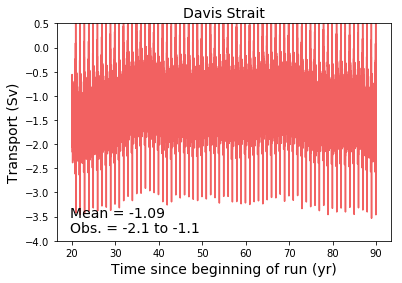

In [17]:
davis = Transport(args,'Davis_Strait','vmo',label='Davis Strait',ylim=(-4.0,0.5))
plotPanel(davis, observedFlows=observedFlows)

### Denmark Strait

Processing  Denmark_Strait


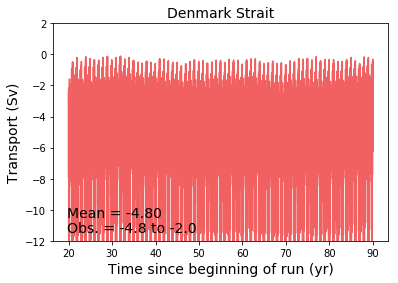

In [18]:
denmark = Transport(args,'Denmark_Strait','vmo',label='Denmark Strait',ylim=(-12,2))
plotPanel(denmark, observedFlows=observedFlows)

### Drake Passage

Processing  Drake_Passage


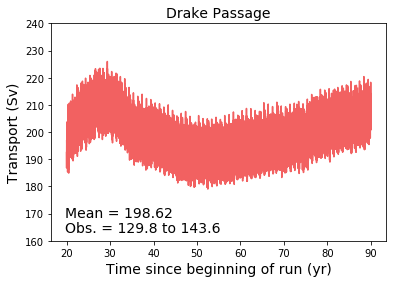

In [33]:
drake = Transport(args,'Drake_Passage','umo',label='Drake Passage',ylim=(160,240))
plotPanel(drake, observedFlows=observedFlows)

### English Channel

Processing  English_Channel


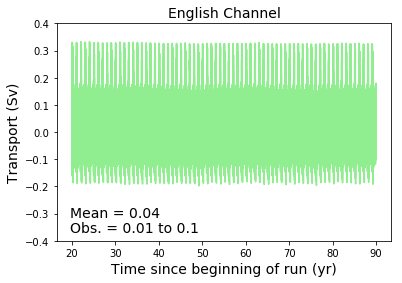

In [20]:
english = Transport(args,'English_Channel','umo',label='English Channel',ylim=(-0.4,0.4))
plotPanel(english, observedFlows=observedFlows)

### Florida Bahamas

Processing  Florida_Bahamas


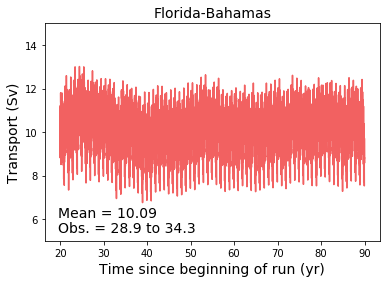

In [21]:
florida = Transport(args,'Florida_Bahamas','vmo',label='Florida-Bahamas',ylim=(5,15))
plotPanel(florida, observedFlows=observedFlows)

### Fram Strait

Processing  Fram_Strait


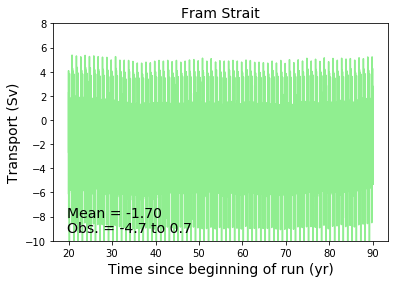

In [22]:
fram = Transport(args,'Fram_Strait','vmo',label='Fram Strait',ylim=(-10,8))
plotPanel(fram, observedFlows=observedFlows)

### Gibraltar Strait

Processing  Gibraltar_Strait


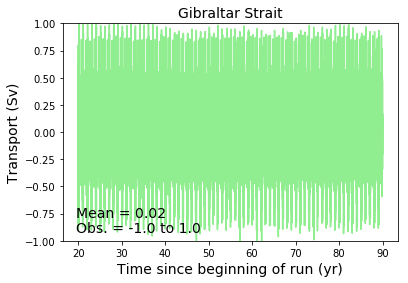

In [23]:
gibraltar = Transport(args,'Gibraltar_Strait','umo',label='Gibraltar Strait',ylim=(-1.0,1.0))
plotPanel(gibraltar, observedFlows=observedFlows)

### Hormuz Strait (Persian Gulf or Arabic Sea)

Processing  Hormuz_Strait


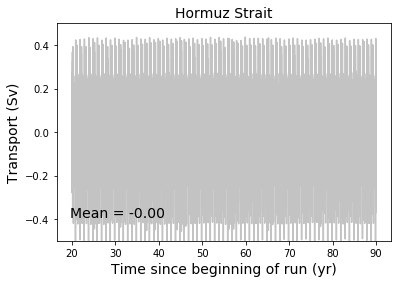

In [24]:
hormuz = Transport(args,'Hormuz_Strait','umo',label='Hormuz Strait',ylim=(-0.5,0.5))
plotPanel(hormuz, observedFlows=observedFlows)

### Iceland Norway

Processing  Iceland_Norway


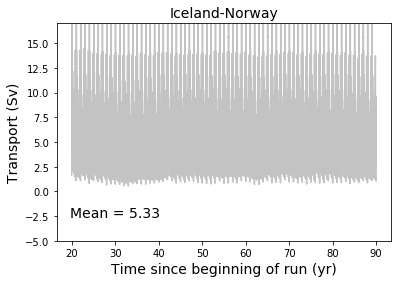

In [25]:
iceland = Transport(args,'Iceland_Norway','vmo',label='Iceland-Norway',ylim=(-5,17))
plotPanel(iceland, observedFlows=observedFlows) 

### Indonesian Throughflow

Processing  Indonesian_Throughflow


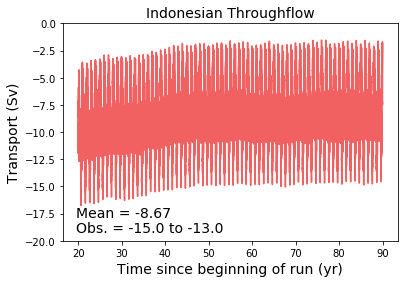

In [26]:
indo = Transport(args,'Indonesian_Throughflow','vmo',label='Indonesian Throughflow',ylim=(-20,0))
plotPanel(indo, observedFlows=observedFlows)

### Mozambique Channel

Processing  Mozambique_Channel


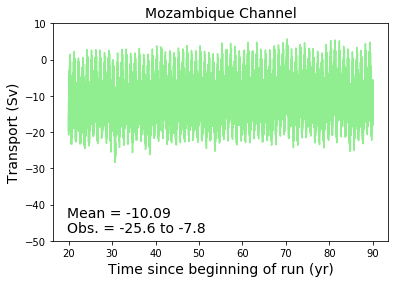

In [27]:
mozambique = Transport(args,'Mozambique_Channel','vmo',label='Mozambique Channel',ylim=(-50,10))
plotPanel(mozambique, observedFlows=observedFlows)

### Pacific undercurrent

Processing  Pacific_undercurrent


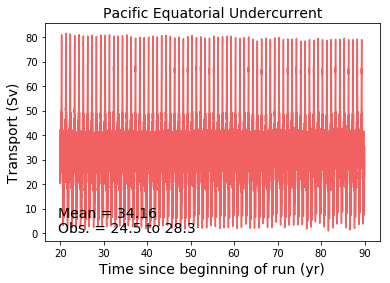

In [28]:
euc = Transport(args,'Pacific_undercurrent','umo',label='Pacific Equatorial Undercurrent',ylim=None, zlim=(0,350))
plotPanel(euc, observedFlows=observedFlows)

### Taiwan Luzon

Processing  Taiwan_Luzon


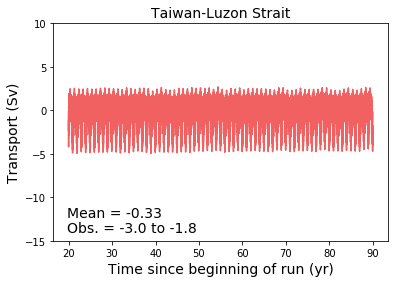

In [29]:
taiwan = Transport(args,'Taiwan_Luzon','umo',label='Taiwan-Luzon Strait',ylim=(-15,10))
plotPanel(taiwan, observedFlows=observedFlows)

### Windward Passage

Processing  Windward_Passage


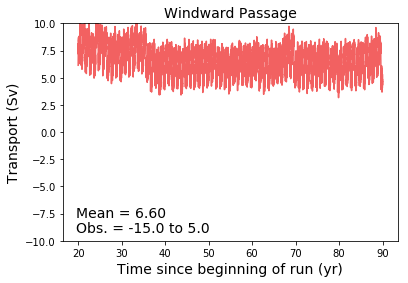

In [30]:
windward = Transport(args,'Windward_Passage','vmo',label='Windward Passage',ylim=(-10,10))
plotPanel(windward, observedFlows=observedFlows)